In [12]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional, GRU
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.optimizers import Adamax
import matplotlib.pyplot as plt

In [13]:
max_features = 10000
maxlen = 500
batch_size = 64

In [14]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [15]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

GRU

In [17]:
model_GRU = Sequential([
  Embedding(max_features, 32),

  GRU(32),

  Dense(1, activation='sigmoid')
  ]
)

model_GRU.compile(optimizer=Adamax(learning_rate=0.0005), loss='binary_crossentropy', metrics=['acc'])

In [18]:
history_GRU = model_GRU.fit(input_train, y_train, epochs=10, steps_per_epoch=200, batch_size=64, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 70s 332ms/step - acc: 0.5358 - loss: 0.6918 - val_acc: 0.6210 - val_loss: 0.6841
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 39s 193ms/step - acc: 0.6447 - loss: 0.6746 - val_acc: 0.7120 - val_loss: 0.6345
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 67s 335ms/step - acc: 0.7675 - loss: 0.5245 - val_acc: 0.8318 - val_loss: 0.4037
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 40s 201ms/step - acc: 0.8276 - loss: 0.4024 - val_acc: 0.8424 - val_loss: 0.3723
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 67s 335ms/step - acc: 0.8619 - loss: 0.3451 - val_acc: 0.8518 - val_loss: 0.3420
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 39s 195ms/step - acc: 0.8752 - loss: 0.3040 - val_acc: 0.8706 - val_loss: 0.3182
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 103s 334ms/step - acc: 0.8933 - loss: 0.2750 - val_acc: 0.8732 - val_loss: 0.3049
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 39s 193ms/step - acc: 0.8992 - loss: 0.2554 - val_acc: 0.8738 - val_loss: 0.2998
Epoch 9/10
200/200 ━━━━━━━━━━━━

In [19]:
_, accuracy_GRU = model_GRU.evaluate(input_test, y_test)
print("Test accuracy:", accuracy_GRU)

782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - acc: 0.8782 - loss: 0.2942
Test accuracy: 0.8759199976921082


LSTM

In [21]:
model_LSTM = Sequential([
  Embedding(max_features, 32),

  LSTM(32),

  Dense(1, activation='sigmoid')
  ]
)

model_LSTM.compile(optimizer=Adamax(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history_LSTM = model_LSTM.fit(input_train, y_train, epochs=10, steps_per_epoch=200, batch_size=64, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 50s 237ms/step - accuracy: 0.5288 - loss: 0.6922 - val_accuracy: 0.6610 - val_loss: 0.6546
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 28s 140ms/step - accuracy: 0.7069 - loss: 0.6147 - val_accuracy: 0.7572 - val_loss: 0.5693
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 53s 264ms/step - accuracy: 0.7814 - loss: 0.5467 - val_accuracy: 0.8144 - val_loss: 0.4880
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 147ms/step - accuracy: 0.8135 - loss: 0.4749 - val_accuracy: 0.8122 - val_loss: 0.4654
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 106s 233ms/step - accuracy: 0.8386 - loss: 0.4334 - val_accuracy: 0.8452 - val_loss: 0.4200
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - accuracy: 0.8641 - loss: 0.3887 - val_accuracy: 0.8552 - val_loss: 0.3958
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 50s 244ms/step - accuracy: 0.8802 - loss: 0.3567 - val_accuracy: 0.8626 - val_loss: 0.3695
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 30s 147ms/step - accuracy: 0.8793 - loss: 

In [23]:
_, accuracy_LSTM = model_LSTM.evaluate(input_test, y_test)
print("Test accuracy:", accuracy_LSTM)

782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.8670 - loss: 0.3368
Test accuracy: 0.8679599761962891


RNN

In [25]:
model_RNN = Sequential([
  Embedding(max_features, 32),

  SimpleRNN(32),

  Dense(1, activation='sigmoid')
  ]
)


model_RNN.compile(optimizer=Adamax(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
history_RNN = model_RNN.fit(input_train, y_train, epochs=10, steps_per_epoch=200, batch_size=64, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 33s 150ms/step - accuracy: 0.5080 - loss: 0.6958 - val_accuracy: 0.5420 - val_loss: 0.6897
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.5464 - loss: 0.6852 - val_accuracy: 0.5596 - val_loss: 0.6858
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 62s 137ms/step - accuracy: 0.6369 - loss: 0.6513 - val_accuracy: 0.6962 - val_loss: 0.6171
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.7190 - loss: 0.5874 - val_accuracy: 0.7230 - val_loss: 0.5681
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 132ms/step - accuracy: 0.7488 - loss: 0.5347 - val_accuracy: 0.7932 - val_loss: 0.4891
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.7895 - loss: 0.4796 - val_accuracy: 0.7896 - val_loss: 0.4763
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 66s 132ms/step - accuracy: 0.7960 - loss: 0.4640 - val_accuracy: 0.8172 - val_loss: 0.4378
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.8248 - loss: 0.413

In [27]:

_, accuracy_RNN = model_RNN.evaluate(input_test, y_test)
print("Test accuracy:", accuracy_RNN)

782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.8201 - loss: 0.3997
Test accuracy: 0.8150799870491028


BRNN

In [28]:
model_BRNN = Sequential()
model_BRNN.add(Embedding(max_features, 32))
model_BRNN.add(Bidirectional(SimpleRNN(units=32)))
model_BRNN.add(Dense(units=1, activation='sigmoid'))

model_BRNN.compile(optimizer=Adamax(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history_BRNN = model_BRNN.fit(input_train, y_train, epochs=10, steps_per_epoch=200, batch_size=64, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 55s 259ms/step - accuracy: 0.4999 - loss: 0.6964 - val_accuracy: 0.5222 - val_loss: 0.6911
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 31s 155ms/step - accuracy: 0.5290 - loss: 0.6905 - val_accuracy: 0.5368 - val_loss: 0.6896
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 50s 249ms/step - accuracy: 0.5593 - loss: 0.6854 - val_accuracy: 0.5542 - val_loss: 0.6868
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 31s 153ms/step - accuracy: 0.5767 - loss: 0.6795 - val_accuracy: 0.5704 - val_loss: 0.6821
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 52s 252ms/step - accuracy: 0.6447 - loss: 0.6560 - val_accuracy: 0.7104 - val_loss: 0.5871
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 28s 141ms/step - accuracy: 0.7430 - loss: 0.5503 - val_accuracy: 0.7542 - val_loss: 0.5425
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 52s 246ms/step - accuracy: 0.7830 - loss: 0.4962 - val_accuracy: 0.7794 - val_loss: 0.4851
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 30s 150ms/step - accuracy: 0.8129 - loss: 0

In [30]:
_, accuracy_BRNN = model_BRNN.evaluate(input_test, y_test)
print("Test accuracy:", accuracy_BRNN)

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.8097 - loss: 0.4254
Test accuracy: 0.8078399896621704


BLSTM

In [31]:
model_BLSTM = Sequential()
model_BLSTM.add(Embedding(max_features, 32))
model_BLSTM.add(Bidirectional(LSTM(units=32)))
model_BLSTM.add(Dense(units=1, activation='sigmoid'))

model_BLSTM.compile(optimizer=Adamax(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history_BLSTM = model_RNN.fit(input_train, y_train, epochs=10, steps_per_epoch=200, batch_size=64, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8432 - loss: 0.3761 - val_accuracy: 0.8254 - val_loss: 0.3970
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.8482 - loss: 0.3541 - val_accuracy: 0.8422 - val_loss: 0.3708
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 133ms/step - accuracy: 0.8687 - loss: 0.3198 - val_accuracy: 0.8520 - val_loss: 0.3522
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 16s 78ms/step - accuracy: 0.8707 - loss: 0.3195 - val_accuracy: 0.8546 - val_loss: 0.3546
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 133ms/step - accuracy: 0.8905 - loss: 0.2826 - val_accuracy: 0.8512 - val_loss: 0.3512
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.8912 - loss: 0.2768 - val_accuracy: 0.8600 - val_loss: 0.3343
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 64s 138ms/step - accuracy: 0.9049 - loss: 0.2498 - val_accuracy: 0.8688 - val_loss: 0.3181
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9112 - loss: 0.235

In [33]:
_, accuracy_BLSTM = model_BLSTM.evaluate(input_test, y_test)
print("Test accuracy:", accuracy_BLSTM)

782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 67ms/step - accuracy: 0.5126 - loss: 0.6931
Test accuracy: 0.5077599883079529


RNN with deep layers

In [34]:
model_RNNDL = Sequential()
model_RNNDL.add(Embedding(max_features, 32))
model_RNNDL.add(SimpleRNN(units=32, return_sequences=True))
model_RNNDL.add(SimpleRNN(units=32))
model_RNNDL.add(Dense(units=1, activation='sigmoid'))

model_RNNDL.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
history_RNNDL = model_RNNDL.fit(input_train, y_train, epochs=10, steps_per_epoch=200, batch_size=64, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 58s 269ms/step - accuracy: 0.5813 - loss: 0.6657 - val_accuracy: 0.7018 - val_loss: 0.5626
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 33s 165ms/step - accuracy: 0.7779 - loss: 0.4783 - val_accuracy: 0.7998 - val_loss: 0.4416
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 109s 270ms/step - accuracy: 0.8242 - loss: 0.3994 - val_accuracy: 0.8434 - val_loss: 0.3888
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 161ms/step - accuracy: 0.8508 - loss: 0.3532 - val_accuracy: 0.8422 - val_loss: 0.3722
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 109s 269ms/step - accuracy: 0.8943 - loss: 0.2720 - val_accuracy: 0.8472 - val_loss: 0.3661
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 160ms/step - accuracy: 0.8861 - loss: 0.2836 - val_accuracy: 0.8384 - val_loss: 0.3928
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 54s 268ms/step - accuracy: 0.9238 - loss: 0.2078 - val_accuracy: 0.8322 - val_loss: 0.4299
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 161ms/step - accuracy: 0.9166 - loss:

In [36]:
_, accuracy_RNNDL = model_RNNDL.evaluate(input_test, y_test)
print("Test accuracy:", accuracy_RNNDL)

782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.7997 - loss: 0.5591
Test accuracy: 0.8026800155639648


Results

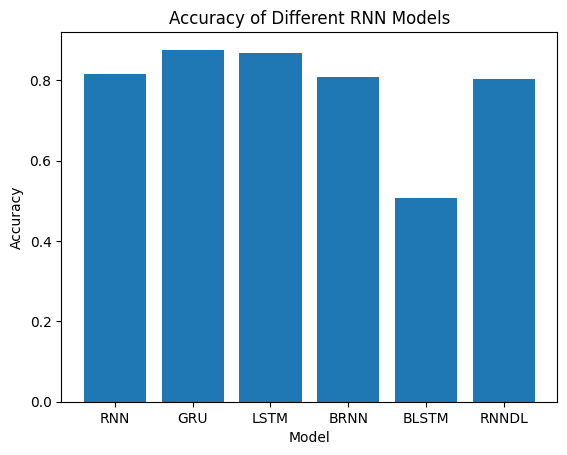

In [37]:
models = ['RNN', 'GRU', 'LSTM', 'BRNN', 'BLSTM', 'RNNDL']
accuracies = [accuracy_RNN, accuracy_GRU, accuracy_LSTM, accuracy_BRNN, accuracy_BLSTM, accuracy_RNNDL]

plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different RNN Models')
plt.show()